## Prescribing of inhaled corticosteroids used in PRINCIPLE trial in non-GP settings

Using OpenSAFELY we have looked at the number of patients who have been prescribed inhaled corticosteroids by GP practices to treat the symptoms of COVID-19.  However, during the pandemic there were a number of "hot hubs" set up in locations to treat patients with COVID-19, therefore keeping the practice as a "cold" site, seeing only COVID-negative patients.  Therefore it is important to check that there was no spike in budesonide prescribin at non-GP settings.

We are not able to identify exactly which prescribing codes have been used as hot hubs - and this will vary across the country.  Some practices will their own prescribing systems in the hub, others will use existed federated codes, and some will use codes newly created during the pandemic specifically for use in the hub.

Therefore we propose using two methods of identifying possible prescribing by "hot hub" sites:
-Those ODS codes NOT coded as `setting=4`, i.e. anything that is not listed as a GP practice
-Those codes set up on or after 1st April 2018, which should pick up a number of PCN-level codes AND newly created codes for the pandemic.

### Practices with setting !=4

In [84]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.dates import  DateFormatter
%matplotlib inline
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps

In [85]:
#get prescribing data from BigQuery
sql ='''
SELECT
  date(month) as month, 
  prac.name,
  practice,
  SUM(items) AS items
FROM
  `ebmdatalab.hscic.normalised_prescribing` AS rx #prescribing dataset
FULL OUTER JOIN
  hscic.practices AS prac # practice dataset
ON
  rx.practice = prac.code
WHERE
  bnf_code IN ('0302000K0AAADAD',
    '0302000K0AAAGAG',
    '0302000K0AAAHAH',
    '0302000K0AAARAR',
    '0302000K0AAASAS',
    '0302000K0AAATAT',
    '0302000K0AAAVAV',
    '0302000K0AAAWAW',
    '0302000K0AABABA',
    '0302000K0BBADAD',
    '0302000K0BBAHAG',
    '0302000K0BBAIAH',
    '0302000K0BBALAT',
    '0302000K0BBANBA',
    '0302000K0BFAAAV',
    '0302000K0BFABAW',
    '0302000K0BGABAG',
    '0302000K0BGACAH') #BNF codes from PRINCIPLE codelist https://www.opencodelists.org/codelist/opensafely/budesonide-inhalers-used-in-principle-trial-cemcmo2021011/0d9a862c/
  AND setting !=4 # remove GP practices
  AND month BETWEEN '2020-07-01' AND '2021-06-01' # run for first six months of 2021
GROUP BY
month, 
  practice,
  prac.name
'''
exportfile = os.path.join("..","data","setting_df.csv") #set path for data cache
setting_df = bq.cached_read(sql, csv_path=exportfile, use_cache=True) #save dataframe to csv

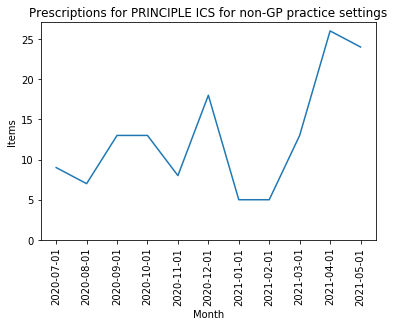

In [86]:
#reset index
set_df = setting_df.groupby(['month']).sum().reset_index()

#draw time series chart
f, ax = plt.subplots(1)
plt.title("Prescriptions for PRINCIPLE ICS for non-GP practice settings")
plt.xlabel("Month")
plt.ylabel("Items")
ax.plot('month', 'items', data=set_df)
ax.set_ylim(bottom=0)
plt.xticks(rotation=90)
plt.show(f)

### Practices with Open Date on or after April 2018

In [87]:
#get prescribing data from BigQuery
sql ='''
SELECT
  date(month) as month, 
  prac.name,
  practice,
  SUM(items) AS items
FROM
  `ebmdatalab.hscic.normalised_prescribing` AS rx #prescribing dataset
FULL OUTER JOIN
  hscic.practices AS prac # practice dataset
ON
  rx.practice = prac.code
WHERE
  bnf_code IN ('0302000K0AAADAD',
    '0302000K0AAAGAG',
    '0302000K0AAAHAH',
    '0302000K0AAARAR',
    '0302000K0AAASAS',
    '0302000K0AAATAT',
    '0302000K0AAAVAV',
    '0302000K0AAAWAW',
    '0302000K0AABABA',
    '0302000K0BBADAD',
    '0302000K0BBAHAG',
    '0302000K0BBAIAH',
    '0302000K0BBALAT',
    '0302000K0BBANBA',
    '0302000K0BFAAAV',
    '0302000K0BFABAW',
    '0302000K0BGABAG',
    '0302000K0BGACAH') #BNF codes from PRINCIPLE codelist https://www.opencodelists.org/codelist/opensafely/budesonide-inhalers-used-in-principle-trial-cemcmo2021011/0d9a862c/
  AND prac.open_date >='2018-04-01'
  AND month BETWEEN '2020-07-01' AND '2021-06-01' # run for first six months of 2021
GROUP BY
month, 
  practice,
  prac.name
'''
exportfile = os.path.join("..","data","open_df.csv") #set path for data cache
open_df = bq.cached_read(sql, csv_path=exportfile, use_cache=True) #save dataframe to csv

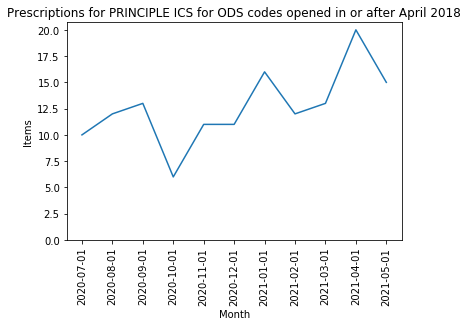

In [88]:
#reset index
opengp_df = open_df.groupby(['month']).sum().reset_index()

#draw time series chart
f, ax = plt.subplots(1)
plt.title("Prescriptions for PRINCIPLE ICS for ODS codes opened in or after April 2018")
plt.xlabel("Month")
plt.ylabel("Items")
ax.plot('month', 'items', data=opengp_df)
ax.set_ylim(bottom=0)
plt.xticks(rotation=90)
plt.show(f)

### Conclusion

As can been seen from the charts above, there was very little prescribing of PRINCIPLE ICS, either in practices marked as "non-GP" settings, or for those that had an opening date in the last three years.  Therefore, it does not appear that there was signficiant prescribing of PRINCIPLE ICS in these settings.  Please note, this includes prescribing for _all_ indications, not just for COVID-19 symptoms.